<a href="https://colab.research.google.com/github/timotdsantos/Data_Science_Samples/blob/master/Fantasy_Points_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup the Notebook

In [ ]:
!pip install PyDrive
!git clone https://github.com/timotdsantos/SportsPredict.git


In [ ]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict


In [ ]:
os.chdir('SportsPredict')


In [ ]:
rb = pd.read_csv('rb_gb_copy.csv', index_col=0)
display(rb.head())
display(rb.columns)

,Vegas_Pts,Vegas_Spread,DEf_Pass,DEF_Rush,DEF_DvP,L3,S,P,RZ,YPA,...,Targets_S,Targets_P,Targets_RZ,Targets_YPT,FP_L3,FP_S,FP_F,FP_C,PTS,GAB
Player Name,,,,,,,,,,,,,,,,,,,,,
1,30.0,8.0,0.09,-0.10,0.14,22.3,21.5,21.0,6.2,4.8,...,5.0,5.4,1.8,8.2,32.8,31.0,25.8,36.2,30.6,G
2,21.0,1.0,-0.08,-0.17,-0.20,23.0,19.5,19.4,2.3,5.0,...,5.0,4.3,0.8,5.5,24.7,21.7,13.9,29.5,3.7,B
3,25.5,-6.0,0.33,0.17,0.48,18.0,17.8,16.9,3.0,4.7,...,4.8,5.1,0.5,5.2,16.2,18.6,11.9,25.4,8.1,B
4,20.0,-5.0,0.06,-0.27,-0.13,17.7,14.2,12.6,1.6,4.9,...,8.0,8.1,0.8,6.0,19.4,20.7,13.6,27.9,14.0,A
5,23.3,-2.5,-0.27,-0.24,-0.44,13.7,12.4,10.1,4.2,4.8,...,10.2,6.8,3.0,6.9,29.3,30.4,13.2,47.6,14.5,A


Index(['Vegas_Pts', 'Vegas_Spread', 'DEf_Pass', 'DEF_Rush', 'DEF_DvP', 'L3',
       'S', 'P', 'RZ', 'YPA', 'Targets_L3', 'Targets_S', 'Targets_P',
       'Targets_RZ', 'Targets_YPT', 'FP_L3', 'FP_S', 'FP_F', 'FP_C', 'PTS',
       'GAB'],
      dtype='object')

In [ ]:
X = rb.drop(["GAB"], axis=1)
y = rb["GAB"]
print(X.shape, y.shape)

(24, 20) (24,)


In [ ]:
X_pts = X.drop("PTS",axis=1)
Y_pts = X["PTS"]

display(X_pts.head())
display(X_pts.shape)
display(Y_pts.head())

,Vegas_Pts,Vegas_Spread,DEf_Pass,DEF_Rush,DEF_DvP,L3,S,P,RZ,YPA,Targets_L3,Targets_S,Targets_P,Targets_RZ,Targets_YPT,FP_L3,FP_S,FP_F,FP_C
Player Name,,,,,,,,,,,,,,,,,,,
1,30.0,8.0,0.09,-0.10,0.14,22.3,21.5,21.0,6.2,4.8,5.3,5.0,5.4,1.8,8.2,32.8,31.0,25.8,36.2
2,21.0,1.0,-0.08,-0.17,-0.20,23.0,19.5,19.4,2.3,5.0,4.0,5.0,4.3,0.8,5.5,24.7,21.7,13.9,29.5
3,25.5,-6.0,0.33,0.17,0.48,18.0,17.8,16.9,3.0,4.7,4.0,4.8,5.1,0.5,5.2,16.2,18.6,11.9,25.4
4,20.0,-5.0,0.06,-0.27,-0.13,17.7,14.2,12.6,1.6,4.9,5.3,8.0,8.1,0.8,6.0,19.4,20.7,13.6,27.9
5,23.3,-2.5,-0.27,-0.24,-0.44,13.7,12.4,10.1,4.2,4.8,11.0,10.2,6.8,3.0,6.9,29.3,30.4,13.2,47.6


(24, 19)

Player Name
1    30.6
2     3.7
3     8.1
4    14.0
5    14.5
Name: PTS, dtype: float64

In [ ]:
# Convert dataframe to np array
X = X_pts.iloc[:,0:19]   
Y = Y_pts.iloc[:]


# Choose the Model that would best predict PTS 
With the current datapoints (24-which is a small number), let's perform KFold Cross validation (10-fold) to get the overall performance of the model on unseen data points.

Mean Squared Error (MSE) measures the average of the squares of the errors or deviations. In other words, it quantifies the difference between the estimator and what is estimated. 

### Baseline Model

In [ ]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [ ]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X.values, Y.values, cv=kfold, n_jobs=1)
print("Results of KFold Cross validation for Baseline Model: %.2f (%.2f) MSE (%.2f) RMSE"  % (results.mean(), results.std(), math.sqrt(results.std())))

Results of KFold Cross validation for Baseline Model: -315.49 (199.00) MSE (14.11) RMSE


In [ ]:
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold, n_jobs=1)
print("Standardized: %.2f (%.2f) MSE (%.2f) RMSE" % (results.mean(), results.std(), math.sqrt(results.std())))

Standardized: -235.16 (171.68) MSE (13.10) RMSE


In [ ]:
results

array([-240.94659424, -400.33456421, -460.73562622, -149.98945618,
         -2.01869249,  -68.46388245, -175.63848877, -146.41835022,
       -562.93945312, -144.15945435])

### Try a Larger Model

In [ ]:
# define the model
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
	return model

In [ ]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline_3l = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_3l = cross_val_score(pipeline_3l, X, Y, cv=kfold, n_jobs=1)
print("Larger: %.2f (%.2f) MSE (%.2f) RMSE"  % (results_3l.mean(), results_3l.std(), math.sqrt(results_3l.std())))

Larger: -3.19 (2.72) MSE (1.65) RMSE


Text(0,0.5,'PTS Predicted')

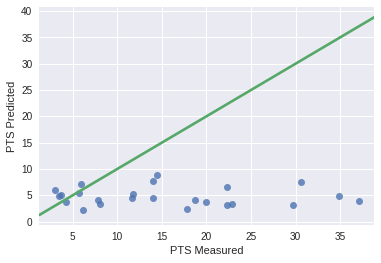

In [ ]:
predicted_3l = cross_val_predict(pipeline_3l, X, Y, cv=kfold)
y=Y
predicted=predicted_3l
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
plt.figure()
ax.set_xlabel('PTS Measured')
ax.set_ylabel('PTS Predicted')

In [ ]:
results

array([-240.94659424, -400.33456421, -460.73562622, -149.98945618,
         -2.01869249,  -68.46388245, -175.63848877, -146.41835022,
       -562.93945312, -144.15945435])

In [ ]:
# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(100, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=50, batch_size=5, verbose=0)))
pipeline_w = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_50w = cross_val_score(pipeline_w, X, Y, cv=kfold, n_jobs=1)
print("Wider: %.2f (%.2f) MSE (%.2f) RMSE "  % (results_50w.mean(), results_50w.std(), math.sqrt(results_50w.std())))

Wider: -144.26 (119.56) MSE (10.93) RMSE 


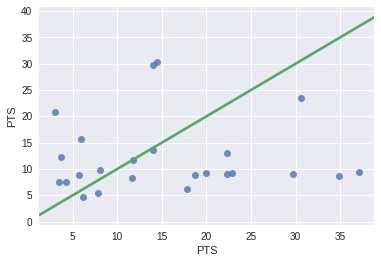

In [ ]:
predicted_w = cross_val_predict(pipeline_w, X, Y, cv=kfold)
y=Y
predicted=predicted_w
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);


Text(0,0.5,'PTS error')

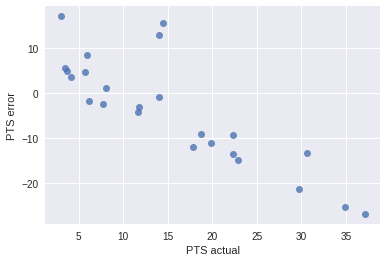

In [ ]:
fig2 = plt.figure()
bx = sns.regplot(Y,predicted-Y, fit_reg=False, scatter=True);
bx.set_xlabel('PTS actual')
bx.set_ylabel('PTS error')

### Wide Model

Wider: -1.68 (1.91) MSE (1.38) RMSE 


Text(0,0.5,'PTS Predicted')

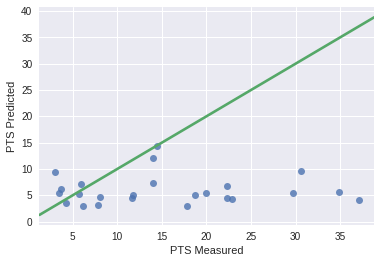

In [ ]:
# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(100, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
	return model
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=50, batch_size=5, verbose=0)))
pipeline_w = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_50w = cross_val_score(pipeline_w, X, Y, cv=kfold, n_jobs=1)
print("Wider: %.2f (%.2f) MSE (%.2f) RMSE "  % (results_50w.mean(), results_50w.std(), math.sqrt(results_50w.std())))

predicted_w = cross_val_predict(pipeline_w, X, Y, cv=kfold)
y=Y
predicted=predicted_w
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
plt.figure()
# sns.pointplot(Y,predicted-Y)
ax.set_xlabel('PTS Measured')
ax.set_ylabel('PTS Predicted')

In [ ]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline_w100 = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_100w = cross_val_score(pipeline_w100, X, Y, cv=kfold, n_jobs=1)
print("Wider @ 100 epochs: %.2f (%.2f) MSE (%.2f) RMSE "  % (results_100w.mean(), results_100w.std(), math.sqrt(results_100w.std())))

Wider @ 100 epochs: -184.96 (154.59) MSE (12.43) RMSE 


### Use More layers and more nodes

In [ ]:
# define wider model
def deeper_wider_model():
	# create model
	model = Sequential()
	model.add(Dense(100, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(100, kernel_initializer='normal', activation='relu'))
	model.add(Dense(3, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mae', optimizer='adam')
	return model

In [ ]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deeper_wider_model, epochs=50, batch_size=5, verbose=0)))
pipeline_dwr = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
loo = LeaveOneOut()
# results_4l = cross_val_score(pipeline_dwr, X, Y, cv=kfold, n_jobs=1)
print("Deep and Wide cv: %.2f (%.2f) MSE (%.2f) RMSE "  % (results_4l.mean(), results_4l.std(), math.sqrt(results_4l.std())))

Deep and Wide cv: -12.03 (5.10) MSE (2.26) RMSE 


Text(0,0.5,'PTS Predicted')

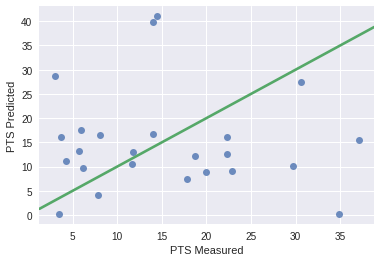

In [ ]:
predicted_dwr = cross_val_predict(pipeline_dwr, X, Y, cv=kfold)
y=Y
predicted=predicted_dwr
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
plt.figure()
# sns.pointplot(Y,predicted-Y)
ax.set_xlabel('PTS Measured')
ax.set_ylabel('PTS Predicted')

In [ ]:
# define wider model
def deep_wide_model():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mae', optimizer='adam')
	return model

In [ ]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deep_wide_model, epochs=50, batch_size=5, verbose=0)))
pipeline_dw = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
results_dw = cross_val_score(pipeline_dw, X, Y, cv=kfold, n_jobs=1)
print("Deep - Wide cv: %.2f (%.2f)MAE (%.2f) RMSE "  % (results_dw.mean(), results_dw.std(), math.sqrt(results_dw.std())))


Deep - Wide cv: -11.76 (4.81) (2.19) RMSE 


Text(0,0.5,'PTS Predicted')

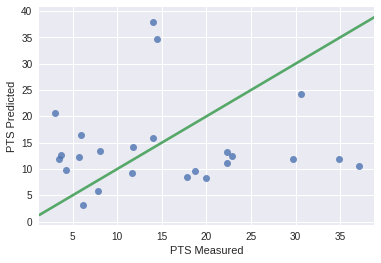

In [ ]:
# predicted_dw = cross_val_predict(pipeline_dw, X, Y, cv=kfold)
y=Y
predicted=predicted_dw
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
plt.figure()
# sns.pointplot(Y,predicted-Y)
ax.set_xlabel('PTS Measured')
ax.set_ylabel('PTS Predicted')

### Deep Model - Optimized using Mean Square Log error

Wider: -0.86 (0.62) Mean Squared Log Error 


Text(0,0.5,'PTS error')

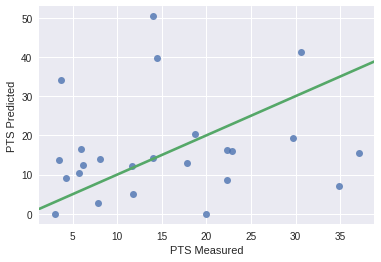

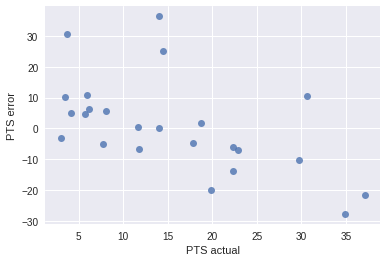

In [ ]:
# define wider model
def deep_model():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
#   model=tf.estimator.DNNRegressor(hidden_units=[6,10,6],feature_columns=feat_cols)

	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
	return model

np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deep_model, epochs=200, batch_size=5, verbose=0)))
pipeline_w = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_50w = cross_val_score(pipeline_w, X, Y, cv=kfold, n_jobs=1)
print("Wider: %.2f (%.2f) Mean Squared Log Error "  % (results_50w.mean(), results_50w.std()))

predicted_w = cross_val_predict(pipeline_w, X, Y, cv=kfold)
# y=Y
# predicted=predicted_w
# fig, ax = plt.subplots()
# ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
# sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
# plt.figure()
# # sns.pointplot(Y,predicted-Y)
# ax.set_xlabel('PTS Measured')
# ax.set_ylabel('PTS Predicted')
y=Y
predicted=predicted_w
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
ax.set_xlabel('PTS Measured')
ax.set_ylabel('PTS Predicted')
fig2 = plt.figure()
bx = sns.regplot(Y,predicted-Y, fit_reg=False, scatter=True);
bx.set_xlabel('PTS actual')
bx.set_ylabel('PTS error')

### Deep Model - using Mean Absolute Error (MAE)

Text(0,0.5,'PTS Predicted')

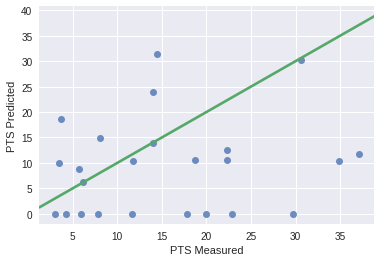

In [ ]:
# define wider model
def deep_model():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
#   model=tf.estimator.DNNRegressor(hidden_units=[6,10,6],feature_columns=feat_cols)

	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mae', optimizer='adam')
	return model

np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deep_model, epochs=50, batch_size=5, verbose=0)))
pipeline_w = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_50w = cross_val_score(pipeline_w, X, Y, cv=kfold, n_jobs=1)
print("Wider: %.2f (%.2f) MSE (%.2f) RMSE "  % (results_50w.mean(), results_50w.std(), math.sqrt(results_50w.std())))

predicted_w = cross_val_predict(pipeline_w, X, Y, cv=kfold)

y=Y
predicted=predicted_w
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
plt.figure()
# sns.pointplot(Y,predicted-Y)
ax.set_xlabel('PTS Measured')
ax.set_ylabel('PTS Predicted')


### Deep Model - MSE \*currently best fit*

In [ ]:
# define wider model
def deep_model_mse():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))

	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='rmsprop')
	return model

Deep - Wide cv: -151.25 (109.49)MSE (10.46) RMSE 


Text(0,0.5,'PTS error')

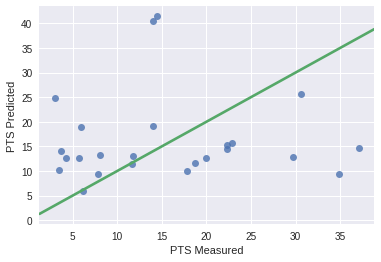

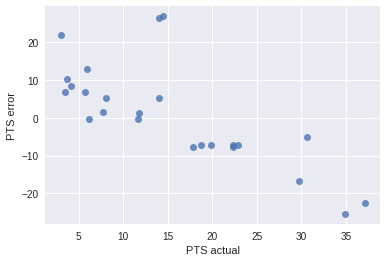

In [ ]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deep_model_mse, epochs=50, batch_size=5, verbose=0)))
pipeline_dmse = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_dmse = cross_val_score(pipeline_dmse, X, Y, cv=kfold, n_jobs=1)
predicted_dmse = cross_val_predict(pipeline_dmse, X, Y, cv=kfold)
print("Deep - Wide cv: %.2f (%.2f)MSE (%.2f) RMSE "  % (results_dmse.mean(), results_dmse.std(), math.sqrt(results_dmse.std())))

y=Y
predicted=predicted_dmse
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
ax.set_xlabel('PTS Measured')
ax.set_ylabel('PTS Predicted')
fig2 = plt.figure()
bx = sns.regplot(Y,predicted-Y, fit_reg=False, scatter=True);
bx.set_xlabel('PTS actual')
bx.set_ylabel('PTS error')


# Train Final Model using all data for prediction
Now that we've validated the one that performs best in cross validation, which is the deep model 19-19-19-19-19

In [ ]:
# Go directly here to train model
# os.chdir('SportsPredict') #if you aren't in the directory

rb = pd.read_csv('rb_gb_copy.csv', index_col=0)
display(rb.head())
display(rb.columns)


,Vegas_Pts,Vegas_Spread,DEf_Pass,DEF_Rush,DEF_DvP,L3,S,P,RZ,YPA,...,Targets_S,Targets_P,Targets_RZ,Targets_YPT,FP_L3,FP_S,FP_F,FP_C,PTS,GAB
Player Name,,,,,,,,,,,,,,,,,,,,,
1,30.0,8.0,0.09,-0.10,0.14,22.3,21.5,21.0,6.2,4.8,...,5.0,5.4,1.8,8.2,32.8,31.0,25.8,36.2,30.6,G
2,21.0,1.0,-0.08,-0.17,-0.20,23.0,19.5,19.4,2.3,5.0,...,5.0,4.3,0.8,5.5,24.7,21.7,13.9,29.5,3.7,B
3,25.5,-6.0,0.33,0.17,0.48,18.0,17.8,16.9,3.0,4.7,...,4.8,5.1,0.5,5.2,16.2,18.6,11.9,25.4,8.1,B
4,20.0,-5.0,0.06,-0.27,-0.13,17.7,14.2,12.6,1.6,4.9,...,8.0,8.1,0.8,6.0,19.4,20.7,13.6,27.9,14.0,A
5,23.3,-2.5,-0.27,-0.24,-0.44,13.7,12.4,10.1,4.2,4.8,...,10.2,6.8,3.0,6.9,29.3,30.4,13.2,47.6,14.5,A


Index(['Vegas_Pts', 'Vegas_Spread', 'DEf_Pass', 'DEF_Rush', 'DEF_DvP', 'L3',
       'S', 'P', 'RZ', 'YPA', 'Targets_L3', 'Targets_S', 'Targets_P',
       'Targets_RZ', 'Targets_YPT', 'FP_L3', 'FP_S', 'FP_F', 'FP_C', 'PTS',
       'GAB'],
      dtype='object')

In [ ]:
# Do this step if your data has GAB column, otherwise skip it
X = rb.drop(["GAB"], axis=1)
y = rb["GAB"]
print(X.shape, y.shape)


(24, 20) (24,)


In [ ]:
X_pts = X.drop("PTS",axis=1)
Y_pts = X["PTS"]

display(X_pts.head())
display(X_pts.shape)
display(Y_pts.head())
# Convert dataframe to np array
X = X_pts.iloc[:,0:19]   
Y = Y_pts.iloc[:]

,Vegas_Pts,Vegas_Spread,DEf_Pass,DEF_Rush,DEF_DvP,L3,S,P,RZ,YPA,Targets_L3,Targets_S,Targets_P,Targets_RZ,Targets_YPT,FP_L3,FP_S,FP_F,FP_C
Player Name,,,,,,,,,,,,,,,,,,,
1,30.0,8.0,0.09,-0.10,0.14,22.3,21.5,21.0,6.2,4.8,5.3,5.0,5.4,1.8,8.2,32.8,31.0,25.8,36.2
2,21.0,1.0,-0.08,-0.17,-0.20,23.0,19.5,19.4,2.3,5.0,4.0,5.0,4.3,0.8,5.5,24.7,21.7,13.9,29.5
3,25.5,-6.0,0.33,0.17,0.48,18.0,17.8,16.9,3.0,4.7,4.0,4.8,5.1,0.5,5.2,16.2,18.6,11.9,25.4
4,20.0,-5.0,0.06,-0.27,-0.13,17.7,14.2,12.6,1.6,4.9,5.3,8.0,8.1,0.8,6.0,19.4,20.7,13.6,27.9
5,23.3,-2.5,-0.27,-0.24,-0.44,13.7,12.4,10.1,4.2,4.8,11.0,10.2,6.8,3.0,6.9,29.3,30.4,13.2,47.6


(24, 19)

Player Name
1    30.6
2     3.7
3     8.1
4    14.0
5    14.5
Name: PTS, dtype: float64

In [ ]:
# define wider model, use other models if you want
def deep_model_mse():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))

	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='rmsprop')
	return model

# define final model
def final_model():
  model = deep_model_mse()
  return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=final_model, epochs=50, batch_size=5, verbose=0)))
pipeline_f = Pipeline(estimators)

In [ ]:
pipeline_f = pipeline_f.fit(X,Y)


Text(0,0.5,'PTS error')

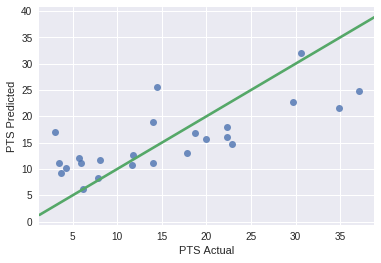

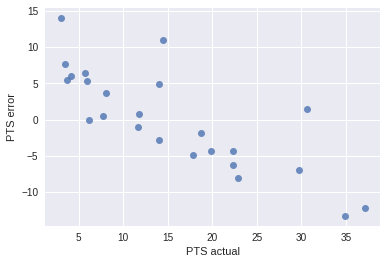

In [ ]:
y_fit = pipeline_f.predict(X)
predicted=y_fit
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
ax.set_xlabel('PTS Actual')
ax.set_ylabel('PTS Predicted')
fig2 = plt.figure()
bx = sns.regplot(Y,predicted-Y, fit_reg=False, scatter=True);
bx.set_xlabel('PTS actual')
bx.set_ylabel('PTS error')

# Predict Fresh Data

In [ ]:
# os.chdir('SportsPredict') #if you aren't in the directory
new_file = 'sample_fresh_data.csv'

fresh_Data = pd.read_csv(new_file, index_col=0)
display(fresh_Data.head())
display(fresh_Data.columns)


,Vegas_Pts,Vegas_Spread,DEf_Pass,DEF_Rush,DEF_DvP,L3,S,P,RZ,YPA,Targets_L3,Targets_S,Targets_P,Targets_RZ,Targets_YPT,FP_L3,FP_S,FP_F,FP_C
Player Name,,,,,,,,,,,,,,,,,,,
1,30.0,8.0,0.09,-0.10,0.14,22.3,21.5,21.0,6.2,4.8,5.3,5.0,5.4,1.8,8.2,32.8,31.0,25.8,36.2
2,21.0,1.0,-0.08,-0.17,-0.20,23.0,19.5,19.4,2.3,5.0,4.0,5.0,4.3,0.8,5.5,24.7,21.7,13.9,29.5
3,25.5,-6.0,0.33,0.17,0.48,18.0,17.8,16.9,3.0,4.7,4.0,4.8,5.1,0.5,5.2,16.2,18.6,11.9,25.4
4,20.0,-5.0,0.06,-0.27,-0.13,17.7,14.2,12.6,1.6,4.9,5.3,8.0,8.1,0.8,6.0,19.4,20.7,13.6,27.9
5,23.3,-2.5,-0.27,-0.24,-0.44,13.7,12.4,10.1,4.2,4.8,11.0,10.2,6.8,3.0,6.9,29.3,30.4,13.2,47.6


Index(['Vegas_Pts', 'Vegas_Spread', 'DEf_Pass', 'DEF_Rush', 'DEF_DvP', 'L3',
       'S', 'P', 'RZ', 'YPA', 'Targets_L3', 'Targets_S', 'Targets_P',
       'Targets_RZ', 'Targets_YPT', 'FP_L3', 'FP_S', 'FP_F', 'FP_C'],
      dtype='object')

In [ ]:
X_new = fresh_Data.iloc[:,0:19]   
display(X_new.index)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64', name='Player Name')

In [ ]:
predicted_new = pipeline_f.predict(X_new)
predicted=y_fit
predicted=pd.DataFrame(predicted,columns=['PTS_predicted'],index=X_new.index)
X_new['PTS_predicted'] = predicted['PTS_predicted']
X_new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Vegas_Pts,Vegas_Spread,DEf_Pass,DEF_Rush,DEF_DvP,L3,S,P,RZ,YPA,Targets_L3,Targets_S,Targets_P,Targets_RZ,Targets_YPT,FP_L3,FP_S,FP_F,FP_C,PTS_predicted
Player Name,,,,,,,,,,,,,,,,,,,,
1,30.0,8.0,0.09,-0.10,0.14,22.3,21.5,21.0,6.2,4.8,5.3,5.0,5.4,1.8,8.2,32.8,31.0,25.8,36.2,32.126564
2,21.0,1.0,-0.08,-0.17,-0.20,23.0,19.5,19.4,2.3,5.0,4.0,5.0,4.3,0.8,5.5,24.7,21.7,13.9,29.5,9.216549
3,25.5,-6.0,0.33,0.17,0.48,18.0,17.8,16.9,3.0,4.7,4.0,4.8,5.1,0.5,5.2,16.2,18.6,11.9,25.4,11.758295
4,20.0,-5.0,0.06,-0.27,-0.13,17.7,14.2,12.6,1.6,4.9,5.3,8.0,8.1,0.8,6.0,19.4,20.7,13.6,27.9,11.210446
5,23.3,-2.5,-0.27,-0.24,-0.44,13.7,12.4,10.1,4.2,4.8,11.0,10.2,6.8,3.0,6.9,29.3,30.4,13.2,47.6,25.568073
6,31.5,6.0,0.14,0.07,0.21,17.0,17.2,17.0,2.5,4.4,4.0,2.5,3.7,0.5,11.4,26.1,19.1,8.9,29.3,24.907475
7,23.0,3.5,-0.04,-0.12,-0.07,12.0,11.2,13.4,1.7,4.5,6.0,6.2,5.8,1.0,6.0,20.1,16.7,9.6,23.8,12.948681
8,24.8,1.0,0.01,-0.24,-0.49,5.3,4.8,5.0,1.0,5.1,10.3,8.5,7.4,1.5,6.3,23.0,19.0,12.1,26.0,22.819334
9,25.0,3.0,0.08,0.08,0.35,12.3,10.0,12.1,0.6,5.7,2.0,3.0,4.3,0.4,4.5,13.0,11.5,8.1,14.9,14.807181
